In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# Load the dataset
data = pd.read_csv('AdSmartABdata - AdSmartABdata.csv')

# Display the first few rows of the dataset to understand its structure
print(data.head())


                             auction_id experiment        date  hour  \
0  0008ef63-77a7-448b-bd1e-075f42c55e39    exposed  2020-07-10     8   
1  000eabc5-17ce-4137-8efe-44734d914446    exposed  2020-07-07    10   
2  0016d14a-ae18-4a02-a204-6ba53b52f2ed    exposed  2020-07-05     2   
3  00187412-2932-4542-a8ef-3633901c98d9    control  2020-07-03    15   
4  001a7785-d3fe-4e11-a344-c8735acacc2c    control  2020-07-03    15   

          device_make  platform_os                browser  yes  no  
0  Generic Smartphone            6          Chrome Mobile    0   0  
1  Generic Smartphone            6          Chrome Mobile    0   0  
2               E5823            6  Chrome Mobile WebView    0   1  
3   Samsung SM-A705FN            6               Facebook    0   0  
4  Generic Smartphone            6          Chrome Mobile    0   0  


In [6]:
# Prepare the data by filtering only relevant columns
data = data[['experiment', 'yes']]

# Rename columns for clarity
data.columns = ['Group', 'Conversion']

# Display the first few rows to confirm the changes
print(data.head())


     Group  Conversion
0  exposed           0
1  exposed           0
2  exposed           0
3  control           0
4  control           0


In [7]:
# Calculate conversion rates
conversion_rates = data.groupby('Group')['Conversion'].mean()
print(f"Conversion Rate for Control Group: {conversion_rates['control']:.4f}")
print(f"Conversion Rate for Exposed Group: {conversion_rates['exposed']:.4f}")

# Summary statistics
summary = data.groupby('Group')['Conversion'].agg(['mean', 'std', 'count'])
print(summary)


Conversion Rate for Control Group: 0.0648
Conversion Rate for Exposed Group: 0.0769
             mean       std  count
Group                             
control  0.064849  0.246289   4071
exposed  0.076885  0.266442   4006


In [8]:
# Sample sizes for each group
n_control = summary.loc['control', 'count']
n_exposed = summary.loc['exposed', 'count']

# Calculate the standard error
se_control = np.sqrt(conversion_rates['control'] * (1 - conversion_rates['control']) / n_control)
se_exposed = np.sqrt(conversion_rates['exposed'] * (1 - conversion_rates['exposed']) / n_exposed)

# Calculate the Z-score
z_score = (conversion_rates['exposed'] - conversion_rates['control']) / np.sqrt(se_control**2 + se_exposed**2)
print(f"Z-score: {z_score:.4f}")

# Calculate the p-value
p_value = stats.norm.sf(abs(z_score)) * 2  # Two-tailed test
print(f"P-value: {p_value:.4f}")


Z-score: 2.1075
P-value: 0.0351


In [9]:
alpha = 0.05  # Significance level

if p_value < alpha:
    print("Reject the null hypothesis: There is a statistically significant difference in conversion rates.")
else:
    print("Fail to reject the null hypothesis: There is no statistically significant difference in conversion rates.")


Reject the null hypothesis: There is a statistically significant difference in conversion rates.


C:\Users\My Pc\AppData\Local\Temp\ipykernel_13720\1926905927.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Group', y='Conversion', data=data, ci=None)


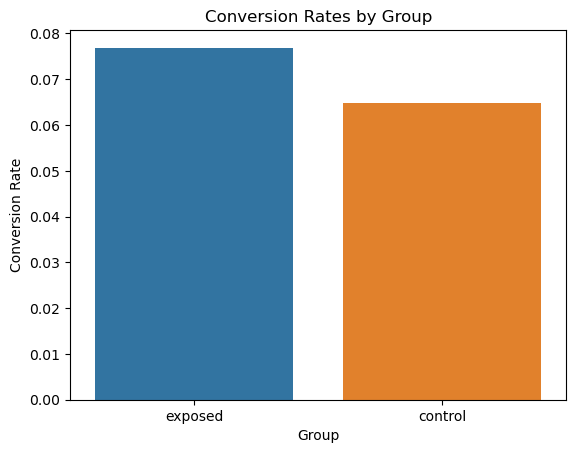

In [10]:
# Plot conversion rates
sns.barplot(x='Group', y='Conversion', data=data, ci=None)
plt.title('Conversion Rates by Group')
plt.ylabel('Conversion Rate')
plt.show()
